# Import packages

In [2]:
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import csv
import regex as re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx 
from collections import Counter
from fa2 import ForceAtlas2
from Functions import DataCollection, DataCleaning, GetConnectedMoviesArtist
from imdb import IMDb

/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# Data Collection 

In [2]:
# params = {
#         "thriller": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],[[]]]}, 
#         "action": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]},             
#         "comedy": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007"]]},
#         "adventure": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [["2020", "2021", "2022", "2023"], ["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"], ["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]}, 
#         "horror": {"years": ["2020", "2021", "2022", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019", "2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"], 
#                 "sub_years": [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]},
#         "fantasy": {"years": ["2020s","2010s", "2000s"],
#                 "sub_years": [[[]],[[]],[[]]]}, 
#         "science_fiction": {"years": ["2020s", "2010s", "2000s"],
#                 "sub_years": [[[]],[[]],[[]]]}, 
#         }

# data_collection = DataCollection()
# data_movie_artist = pd.DataFrame()
# for genre in params.keys():
#     for years, sub_years in zip(params[genre]["years"],params[genre]["sub_years"]):
#         data = data_collection.collect_movies_artist_data(genre, years, sub_years)
#         data_movie_artist = pd.concat([data_movie_artist, data]) 

# data_movie_artist = data_movie_artist.reset_index(drop=True)

In [33]:
data_movie_artist = pd.read_json('data_movie_artist.json', orient='table')
data_movie_artist.shape

(7456, 7)

# Data Cleaning

In [5]:
# data_cleaner = DataCleaning(data_movie_artist)
# data_cleaner.data_cleaning()
# df_movies = data_cleaner.data

In [57]:
df_movies = pd.read_json('df_movies.json', orient='table')
df_movies.shape

(5780, 7)

In [58]:
df_movies = df_movies.iloc[3000:4000]

# Collect Ratings

In [59]:
movies_df = df_movies.copy()


In [60]:
movies_df

Title                Director  \
3000                    They Live in the Grey  burlee vang, abel vang   
3001                      Those Who Walk Away       robert rippberger   
3002                              Torn Hearts              brea grant   
3003                                    Troll             roar uthaug   
3004                                     Umma             iris k shim   
...                                       ...                     ...   
3995  The Haunting Hour: Don't Think About It               alex zamm   
3996                            Brianne Davis               dave sapp   
3997             The Haunting of Sorority Row               bert kish   
3998                    The Hills Have Eyes 2            martin weisz   
3999                              The Hitcher             dave meyers   

                                                   Cast        Country  \
3000                                   michelle krusiec  united states   
3001  booboo stewart, scarlett sperduto, grant morni...  united states   
3002  katey sagal,abby quinn,alexxis lemire,joshua l...  united states   
3003  ine marie wilmann, kim falck,mads sjgard pette...         europe   
3004  sandra oh,fivel stewart,dermot mulroney,odeya ...  united states   
...                                                 ...            ...   
3995            brittany curran,tobin bell,emily osment  united states   
3996          brianne davis, ken luckey,ezra buzzington  united states   
3997              agim darshi,meghan ory, jessica horas         canada   
3998  michael mc millian,jessica stroup,daniella alonso  united states   
3999             sean bean,sophia bush,zachary knighton  united states   

       Genre  Year                                   Hyperref  
3000  Horror  2022                      They_Live_in_the_Grey  
3001  Horror  2022                 Those_Who_Walk_Away_(film)  
3002  Horror  2022                                Torn_Hearts  
3003  Horror  2022                          Troll_(2022_film)  
3004  Horror  2022                           Umma_(2022_film)  
...      ...   ...                                        ...  
3995  Horror  2007  The_Haunting_Hour:_Don%27t_Think_About_It  
3996  Horror  2007                                             
3997  Horror  2007               The_Haunting_of_Sorority_Row  
3998  Horror  2007                      The_Hills_Have_Eyes_2  
3999  Horror  2007                    The_Hitcher_(2007_film)  

[1000 rows x 7 columns]

In [61]:
# Initialize the IMDb object
ia = IMDb()

# Function to get movie rating
def get_movie_rating(title):
    try:
        movie = ia.search_movie(title)[0]  # Assume the first search result is the correct movie
        ia.update(movie)
        return movie.data['rating']
    except Exception as e:
        return None

# Add a new column to the DataFrame with the ratings
movies_df['Rating'] = movies_df['Title'].apply(get_movie_rating)

2023-11-15 21:05:36,656 CRITICAL [imdbpy] /opt/anaconda3/lib/python3.8/site-packages/imdb/_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/find/?q=Cradle+of+Fear&s=tt', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 500: 'Internal Server Error'>},); kwds: {}
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/imdb/parser/http/__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 640, in http_response
    response = self.parent.error(
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/opt/anaconda3/lib/python3.8/urllib/request.py", line 502, in _call_chain
    result = func(*args)
  File 

In [63]:
movies_df[['Title','Rating']].isnull().sum()

Title       0
Rating    132
dtype: int64

In [64]:
movies_df[['Title','Rating']].shape

(1000, 2)

In [65]:
movies_df[['Title','Rating']].to_json('ratings3000_4000.csv', orient='table', indent=1)

# Get connected Movies and Artists

In [5]:
# get_connected_movies_artists = GetConnectedMoviesArtist()
# connected_movies = get_connected_movies_artists.connected_movies_and_cast(df_movies)
# with open('connected_movies_and_casts.json', 'w') as file:
#     json.dump(connected_movies, file, indent=4)

In [3]:
with open('connected_movies_and_casts.json', 'r') as file:
    connected_movies = json.load(file)

In [84]:
len(connected_movies.keys())

NameError: name 'connected_movies' is not defined

In [5]:
connected_movies

{'365 Days': {'365 Days: This Day': ['michele morrone',
   'anna-maria sieklucka',
   'magdalena lamparska']},
 '7500': {'Looper': ['joseph gordon-levitt'],
  'Premium Rush': ['joseph gordon-levitt'],
  'Sin City: A Dame to Kill For': ['joseph gordon-levitt'],
  'Hesher': ['joseph gordon-levitt'],
  '50/50': ['joseph gordon-levitt'],
  'Don Jon': ['joseph gordon-levitt'],
  'The Walk': ['joseph gordon-levitt'],
  'GI Joe: The Rise of Cobra': ['joseph gordon-levitt'],
  'Inception': ['joseph gordon-levitt'],
  'Project Power': ['joseph gordon-levitt'],
  'Treasure Planet': ['joseph gordon-levitt']},
 'Archenemy': {'No Sudden Move': ['amy seimetz'],
  'Sabotage': ['joe manganiello'],
  'The Sleepover': ['joe manganiello'],
  'The Spine of Night': ['joe manganiello'],
  'Pet Sematary': ['amy seimetz'],
  'Rampage': ['joe manganiello'],
  'Upstream Color': ['amy seimetz']},
 'Asuraguru': {'Cocktail ra vijaya murugan': ['yogi babu']},
 'Aswathama': {},
 'Attack': {'Satyameva Jayate 2': ['jo

# Basic Statistics

### Genre distribution

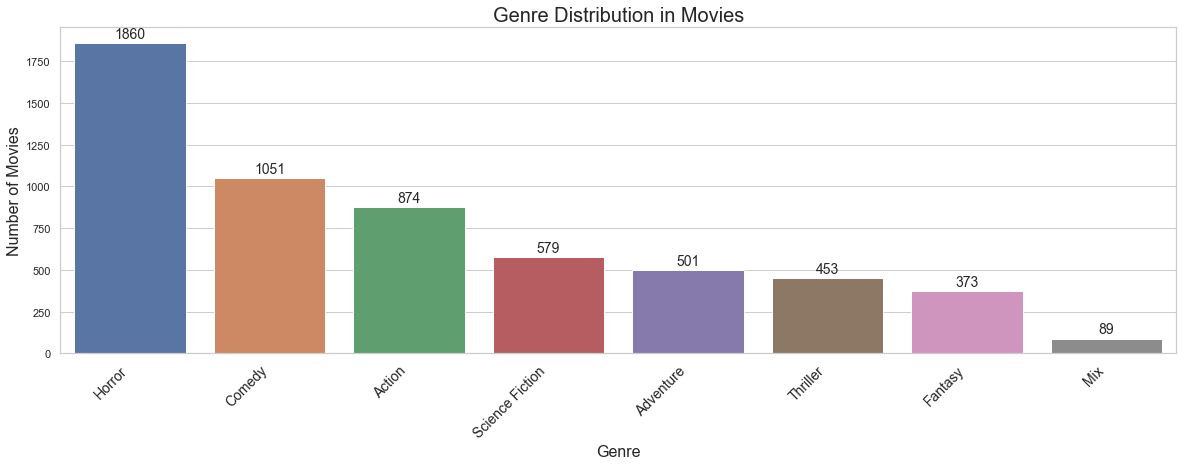

In [12]:
genre_counts = df_movies['Genre'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Genre', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Genre', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Genre Distribution in Movies', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Movies over time 

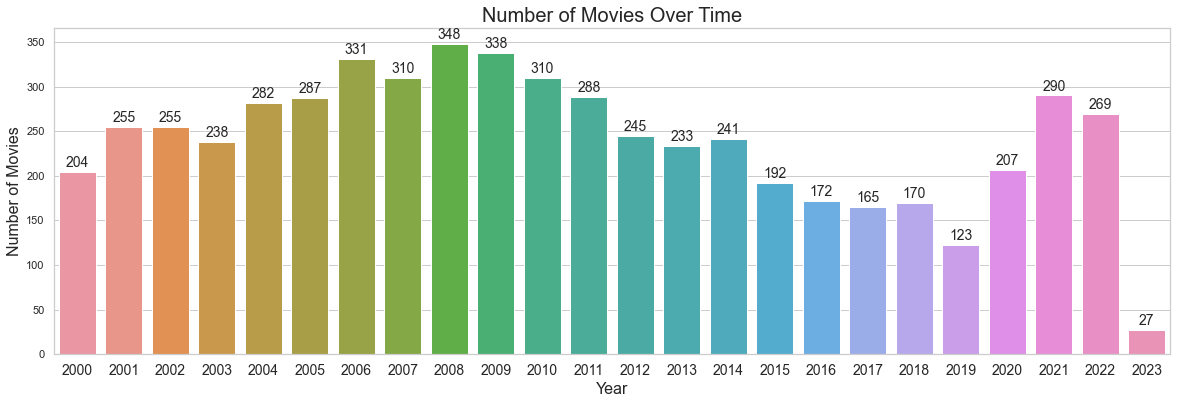

In [13]:
df_movies['Year'] = pd.to_numeric(df_movies['Year'], errors='coerce')
movies_per_year = df_movies.groupby('Year').size()
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Year', y='Number of Movies', data=movies_per_year)
plt.xticks(fontsize=14)
plt.title('Number of Movies Over Time', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Country distribution

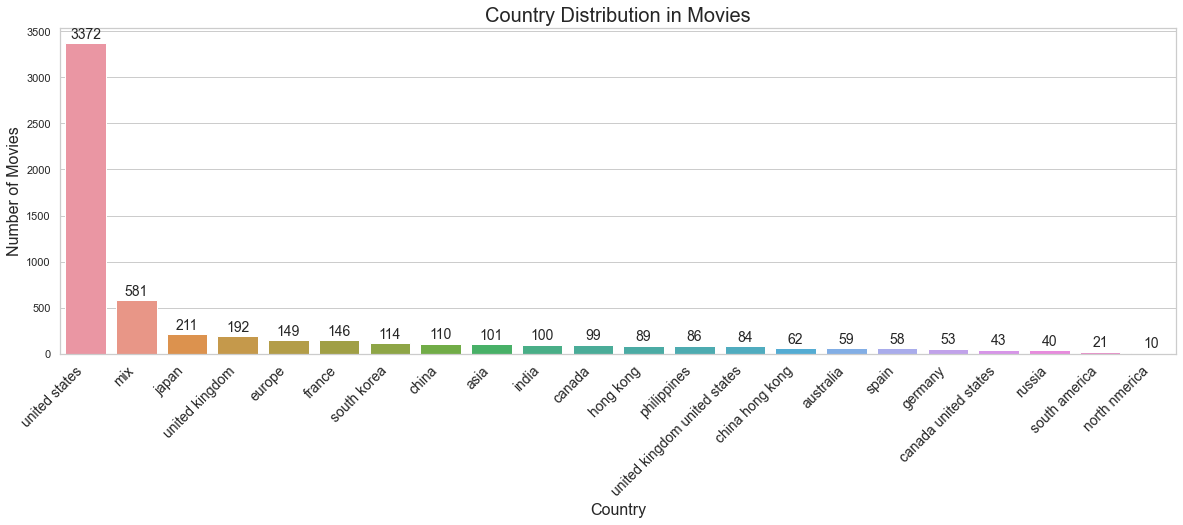

In [14]:
genre_counts = df_movies['Country'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Country', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Country', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Country Distribution in Movies', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

# Network Science

### Creating undirected graph with nodes as artists and edges between artists that have collaborated in movie together

In [16]:
# # Create undirected Graph
G_artist = nx.Graph()

# Adding nodes
all_artist_nodes = list(list(df_movies['Title'].unique()))
G_artist.add_nodes_from(all_artist_nodes)

# Adding edges
for movie, connected_movies in zip(df_movies['Title'], df_movies['Connected Movies']):
    G_artist.add_edges_from([(movie, col) for col in connected_movies])

KeyError: 'Connected Movies'

In [61]:
node_attr = df_movies[['Title', 'Genre', 'Year']].set_index('Title').to_dict('index') 
nx.set_node_attributes(G_artist, node_attr) #Adding attributes to the graph

In [62]:
print("The network consist of: ", G_artist.number_of_edges(), " links")
print("The network consist of: ", G_artist.number_of_nodes(), " nodes (Movies)")

The network consist of:  34940  links
The network consist of:  5724  nodes (Movies)


In [43]:
# # Initialize the graph
# G_artist = nx.Graph()

# # Add nodes
# all_artist_nodes = list(list(artist_collaboration_df['Cast'].unique()))
# G_artist.add_nodes_from(all_artist_nodes)

# # Initialize a Counter to keep track of collaborations
# collaboration_counter = Counter()

# # Update the Counter with each collaboration
# for artist, collaborators in zip(artist_collaboration_df['Cast'], artist_collaboration_df['connected']):
#     for collaborator in collaborators:
#         if artist != collaborator:
#             collaboration_pair = tuple(sorted([artist, collaborator]))
#             collaboration_counter[collaboration_pair] += 1

# # Add weighted edges to the graph
# for (artist1, artist2), weight in collaboration_counter.items():
#     G_artist.add_edge(artist1, artist2, weight=weight)


In [63]:
print("The average degree of the GCC is:", round(sum(dict(G_artist.degree()).values())/len(G_artist.degree)))

The average degree of the GCC is: 12


### Extracting the largest component

In [64]:
#Extracting the largest component
connected_components = nx.connected_components(G_artist)
# Finding the largest connected component
largest_cc = max(connected_components, key=len)
# Creating a subgraph for the largest connected component
G_largest_cc = G_artist.subgraph(largest_cc).copy()

In [65]:
print("The largest connected component network consist of: ", G_largest_cc.number_of_edges(), " links")
print("The largest connected component network consist of: ", G_largest_cc.number_of_nodes(), " nodes (Movies)")

The largest connected component network consist of:  34562  links
The largest connected component network consist of:  4187  nodes (Movies)


In [66]:
print("The average degree of the GCC is:", round(sum(dict(G_largest_cc.degree()).values())/len(G_largest_cc.degree)))

The average degree of the GCC is: 17


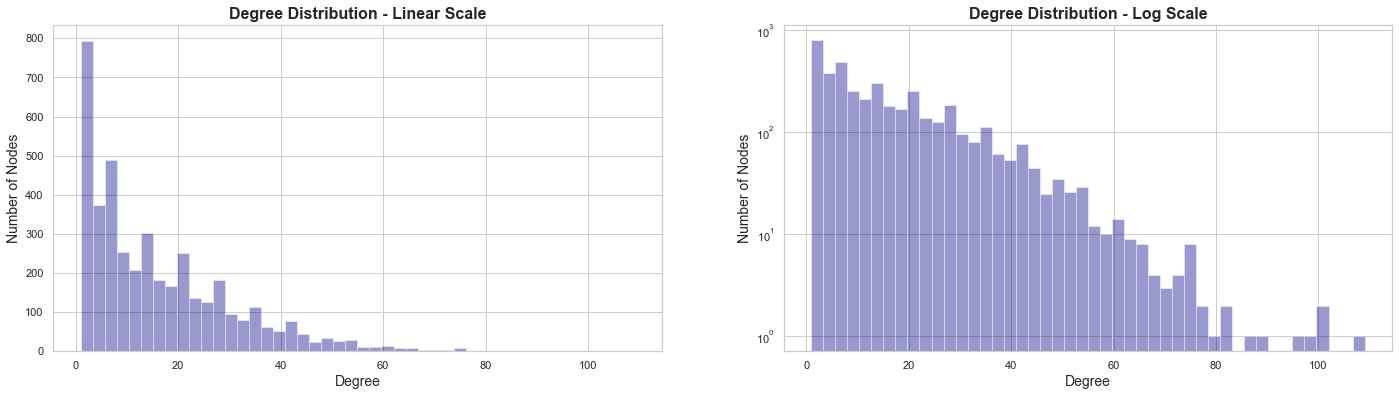

In [47]:
# Calculating degrees for each node
degrees = [G_largest_cc.degree(n) for n in G_largest_cc.nodes()]

# Convert the degrees list to a DataFrame
degrees_df = pd.DataFrame(degrees, columns=['Degree'])

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))

# First subplot for the regular scale histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Linear Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)

# Second subplot for the logarithmic scale histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Log Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.yscale('log')

# Show the plot
plt.show()


### Top connected artists

In [48]:
degrees = dict(G_largest_cc.degree())
degrees_artists = {node: degree for node, degree in degrees.items()}
top_connected = sorted(degrees_artists, key=degrees_artists.get, reverse=True)[:5]
print("Top 5 connected artists: ", top_connected)


Top 5 connected artists:  ['Amsterdam', 'Don t Look Up', 'Thor Love and Thunder', 'Avengers Endgame', 'Dolittle']


### Plot the network

In [221]:
# The Force Atlas 2 algorithm
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs  # (NOT IMPLEMENTED)
                        linLogMode=False,   # (NOT IMPLEMENTED)
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=5.0,

                        # Performance
                        jitterTolerance=0.6,  # Not above 1. 1 is more precise
                        barnesHutOptimize=True,
                        barnesHutTheta=1, # Try 2
                        multiThreaded=False ,  # (NOT IMPLEMENTED)

                        # Tuning
                        scalingRatio=10.0, # Greater number equals less sparse graph
                        strongGravityMode=True,
                        gravity=1500, # Try 1000 is somewhat round but 2000 is very round

                        # Log
                        verbose=True)


In [222]:
positions = forceatlas2.forceatlas2_networkx_layout(G_largest_cc, pos=None, iterations=1000)

100%|██████████| 1000/1000 [01:34<00:00, 10.62it/s]

BarnesHut Approximation  took  20.05  seconds
Repulsion forces  took  70.77  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  1.17  seconds
AdjustSpeedAndApplyForces step  took  0.77  seconds


In [224]:
#Setting up node sizes (depends on degree)
d = dict(G_largest_cc.degree)
deg_size = [v * 3 for v in d.values()]

In [225]:
#Setting up node colors (depends on genre)
nodes_color = []
for node in G_largest_cc.nodes.data():
    if node[1]['Genre'] == 'horror':
        nodes_color.append('red')
    elif (node[1]['Genre'] == 'action'):
        nodes_color.append('#DA70D6')
    elif (node[1]['Genre'] == 'comedy'):
        nodes_color.append('blue')
    elif (node[1]['Genre'] == 'thriller'):
        nodes_color.append('#008080')
    elif (node[1]['Genre'] == 'science_fiction'):
        nodes_color.append('#4B0082')
    elif (node[1]['Genre'] == 'adventure'):
        nodes_color.append('yellow')
    elif (node[1]['Genre'] == 'fantasy'):
        nodes_color.append('orange')
    else:
        nodes_color.append('pink')

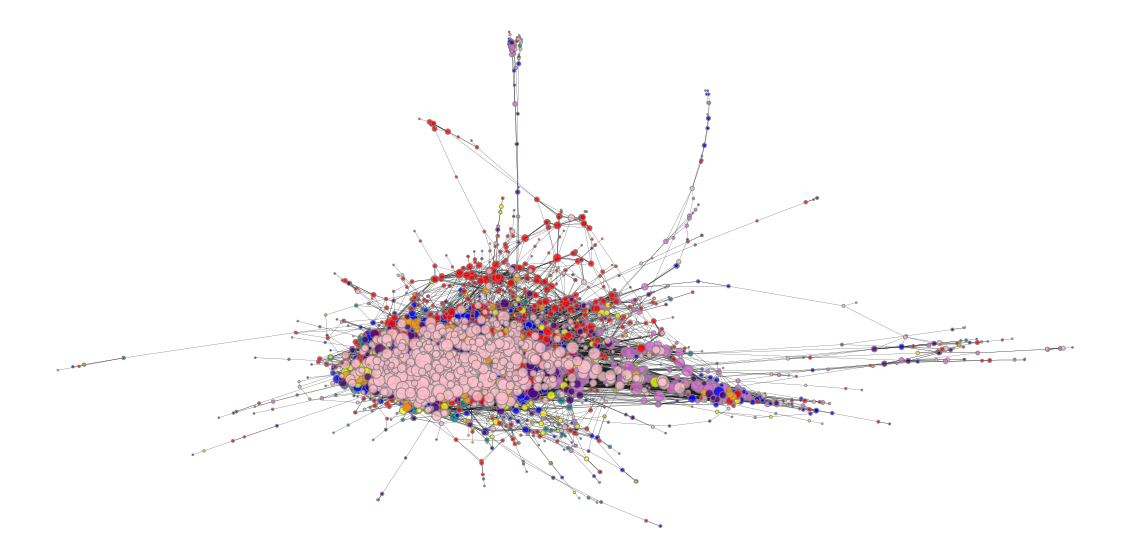

In [226]:
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G_largest_cc, positions, node_size=deg_size, node_color=nodes_color, alpha=0.80, edgecolors='grey')
nx.draw_networkx_edges(G_largest_cc, positions, width = 0.2)#, edge_color=edge_colors,width=0.5)
plt.axis('off')
plt.show()